## 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
* 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

### K-Beauty는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?
* K-Beauty란? [K-Beauty - Wikipedia](https://en.wikipedia.org/wiki/K-Beauty)
* e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )

## 필요 라이브러리 가져오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# os 별로 폰트를 다르게 설정해 줍니다.
if os.name == "posix":
    # Mac
    sns.set(font="AppleGothic")
elif os.name == "nt":
    # Window
    sns.set(font="Malgun Gothic")

In [2]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 데이터 로드하기

In [20]:
df_raw = pd.read_csv("./국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_202205.csv", 
                     encoding="cp949")
df_raw.shape

(450, 36)

In [21]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

일본            45
아세안(ASEAN)    45
중동            45
합계            45
유럽연합(EU)      45
중남미           45
미국            45
대양주           45
중국            45
기타            45
Name: 국가(대륙)별, dtype: int64

In [22]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"].head()

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2019.4/4,2020.1/4,2020.2/4,2020.3/4,2020.4/4,2021.1/4,2021.2/4,2021.3/4,2021.4/4,2022.1/4 p)
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,54054,49162,66097,67920,73390,72577,70460,69519,67036,50156
46,미국,합계,면세점,-,-,-,-,-,-,-,...,1481,698,339,81,67,56,1742,107,108,127
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,52573,48464,65758,67839,73323,72521,68718,69412,66928,50029
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,1383,1182,1631,1871,1373,1644,2118,1535,731,656
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,0,0,0,0,0


## 분석과 시각화를 위한 tidy data 만들기

In [23]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], 
                 var_name="기간", value_name="million")
df

,국가(대륙)별,상품군별,판매유형별,기간,million
0,합계,합계,계,2014.1/4,148272
1,합계,합계,면세점,2014.1/4,-
2,합계,합계,면세점 이외,2014.1/4,-
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-
...,...,...,...,...,...
14845,기타,생활용품 및 자동차용품,면세점,2022.1/4 p),0
14846,기타,생활용품 및 자동차용품,면세점 이외,2022.1/4 p),267
14847,기타,기 타,계,2022.1/4 p),2309
14848,기타,기 타,면세점,2022.1/4 p),0


## 데이터 전처리
### 기간에서 연도를 분리하기

In [24]:
df["연도"] = df["기간"].map(lambda x: x.split(".")[0]).astype(int)
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도
0,합계,합계,계,2014.1/4,148272,2014
1,합계,합계,면세점,2014.1/4,-,2014
2,합계,합계,면세점 이외,2014.1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014
...,...,...,...,...,...,...
14845,기타,생활용품 및 자동차용품,면세점,2022.1/4 p),0,2022
14846,기타,생활용품 및 자동차용품,면세점 이외,2022.1/4 p),267,2022
14847,기타,기 타,계,2022.1/4 p),2309,2022
14848,기타,기 타,면세점,2022.1/4 p),0,2022


In [25]:
int("2019 3/4 p)".split()[1].split("/")[0])

3

In [26]:
df["분기"] = df["기간"].apply(lambda  x : x.split(".")[1].split("/")[0]).astype(int)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014.1/4,148272,2014,1
1,합계,합계,면세점,2014.1/4,-,2014,1
2,합계,합계,면세점 이외,2014.1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014,1


### 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [27]:
df["million"] = df["million"].replace("-", pd.np.nan).astype(float)
df

<ipython-input-27-48df0cf8d4c8>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df["million"] = df["million"].replace("-", pd.np.nan).astype(float)


,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
14845,기타,생활용품 및 자동차용품,면세점,2022.1/4 p),0.0,2022,1
14846,기타,생활용품 및 자동차용품,면세점 이외,2022.1/4 p),267.0,2022,1
14847,기타,기 타,계,2022.1/4 p),2309.0,2022,1
14848,기타,기 타,면세점,2022.1/4 p),0.0,2022,1


### 필요없는 데이터 제거하기

In [28]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.
df = df[(df["국가(대륙)별"] != "합계") & 
        (df["상품군별"] != "합계") & 
        (df["판매유형별"] != "계")].copy()
df

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014.1/4,NaN,2014,1
52,미국,가전·전자·통신기기,면세점,2014.1/4,NaN,2014,1
53,미국,가전·전자·통신기기,면세점 이외,2014.1/4,NaN,2014,1
55,미국,소프트웨어,면세점,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
14843,기타,농축수산물,면세점 이외,2022.1/4 p),10.0,2022,1
14845,기타,생활용품 및 자동차용품,면세점,2022.1/4 p),0.0,2022,1
14846,기타,생활용품 및 자동차용품,면세점 이외,2022.1/4 p),267.0,2022,1
14848,기타,기 타,면세점,2022.1/4 p),0.0,2022,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8316 entries, 49 to 14849
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  8316 non-null   object 
 1   상품군별     8316 non-null   object 
 2   판매유형별    8316 non-null   object 
 3   기간       8316 non-null   object 
 4   million  5292 non-null   float64
 5   연도       8316 non-null   int32  
 6   분기       8316 non-null   int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 454.8+ KB


In [30]:
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
million    3024
연도            0
분기            0
dtype: int64

## K-Beauty 시각화
### 전체 상품군 판매액

<AxesSubplot:xlabel='연도', ylabel='million'>

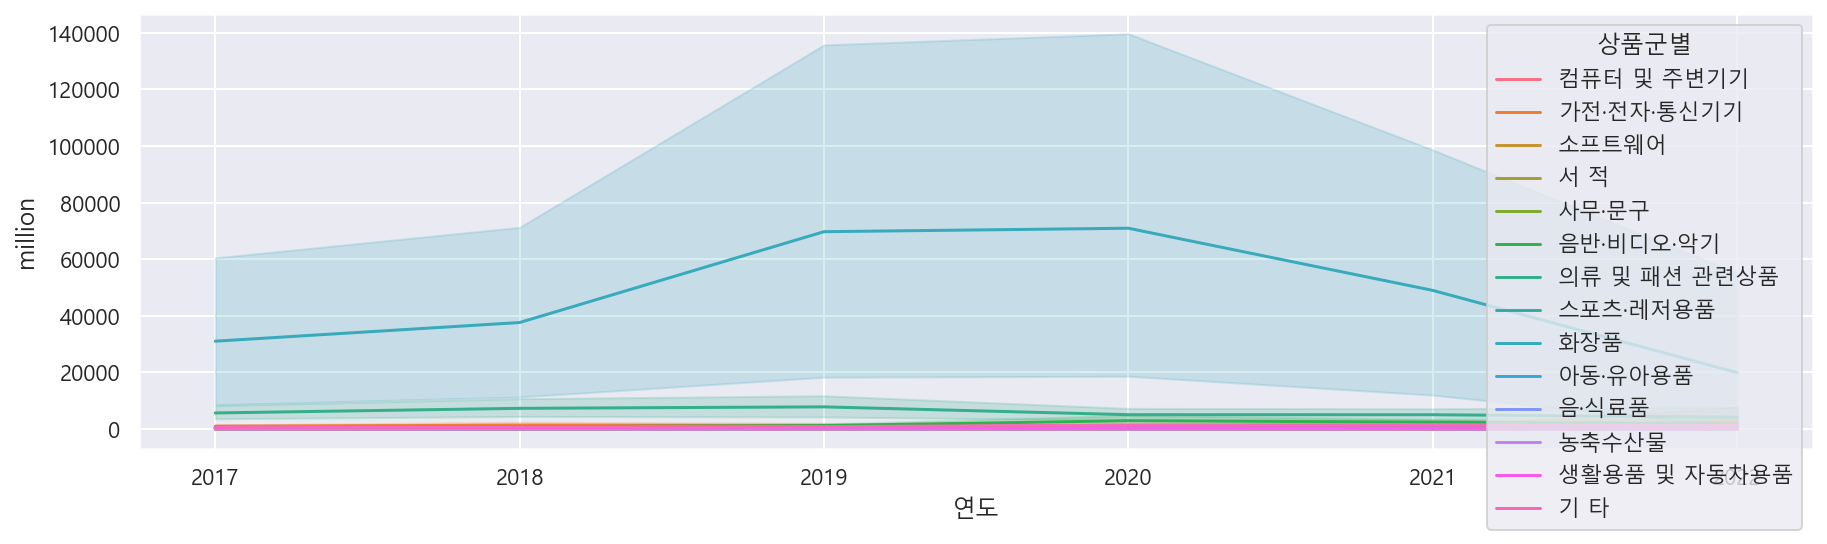

In [31]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df, hue="상품군별")

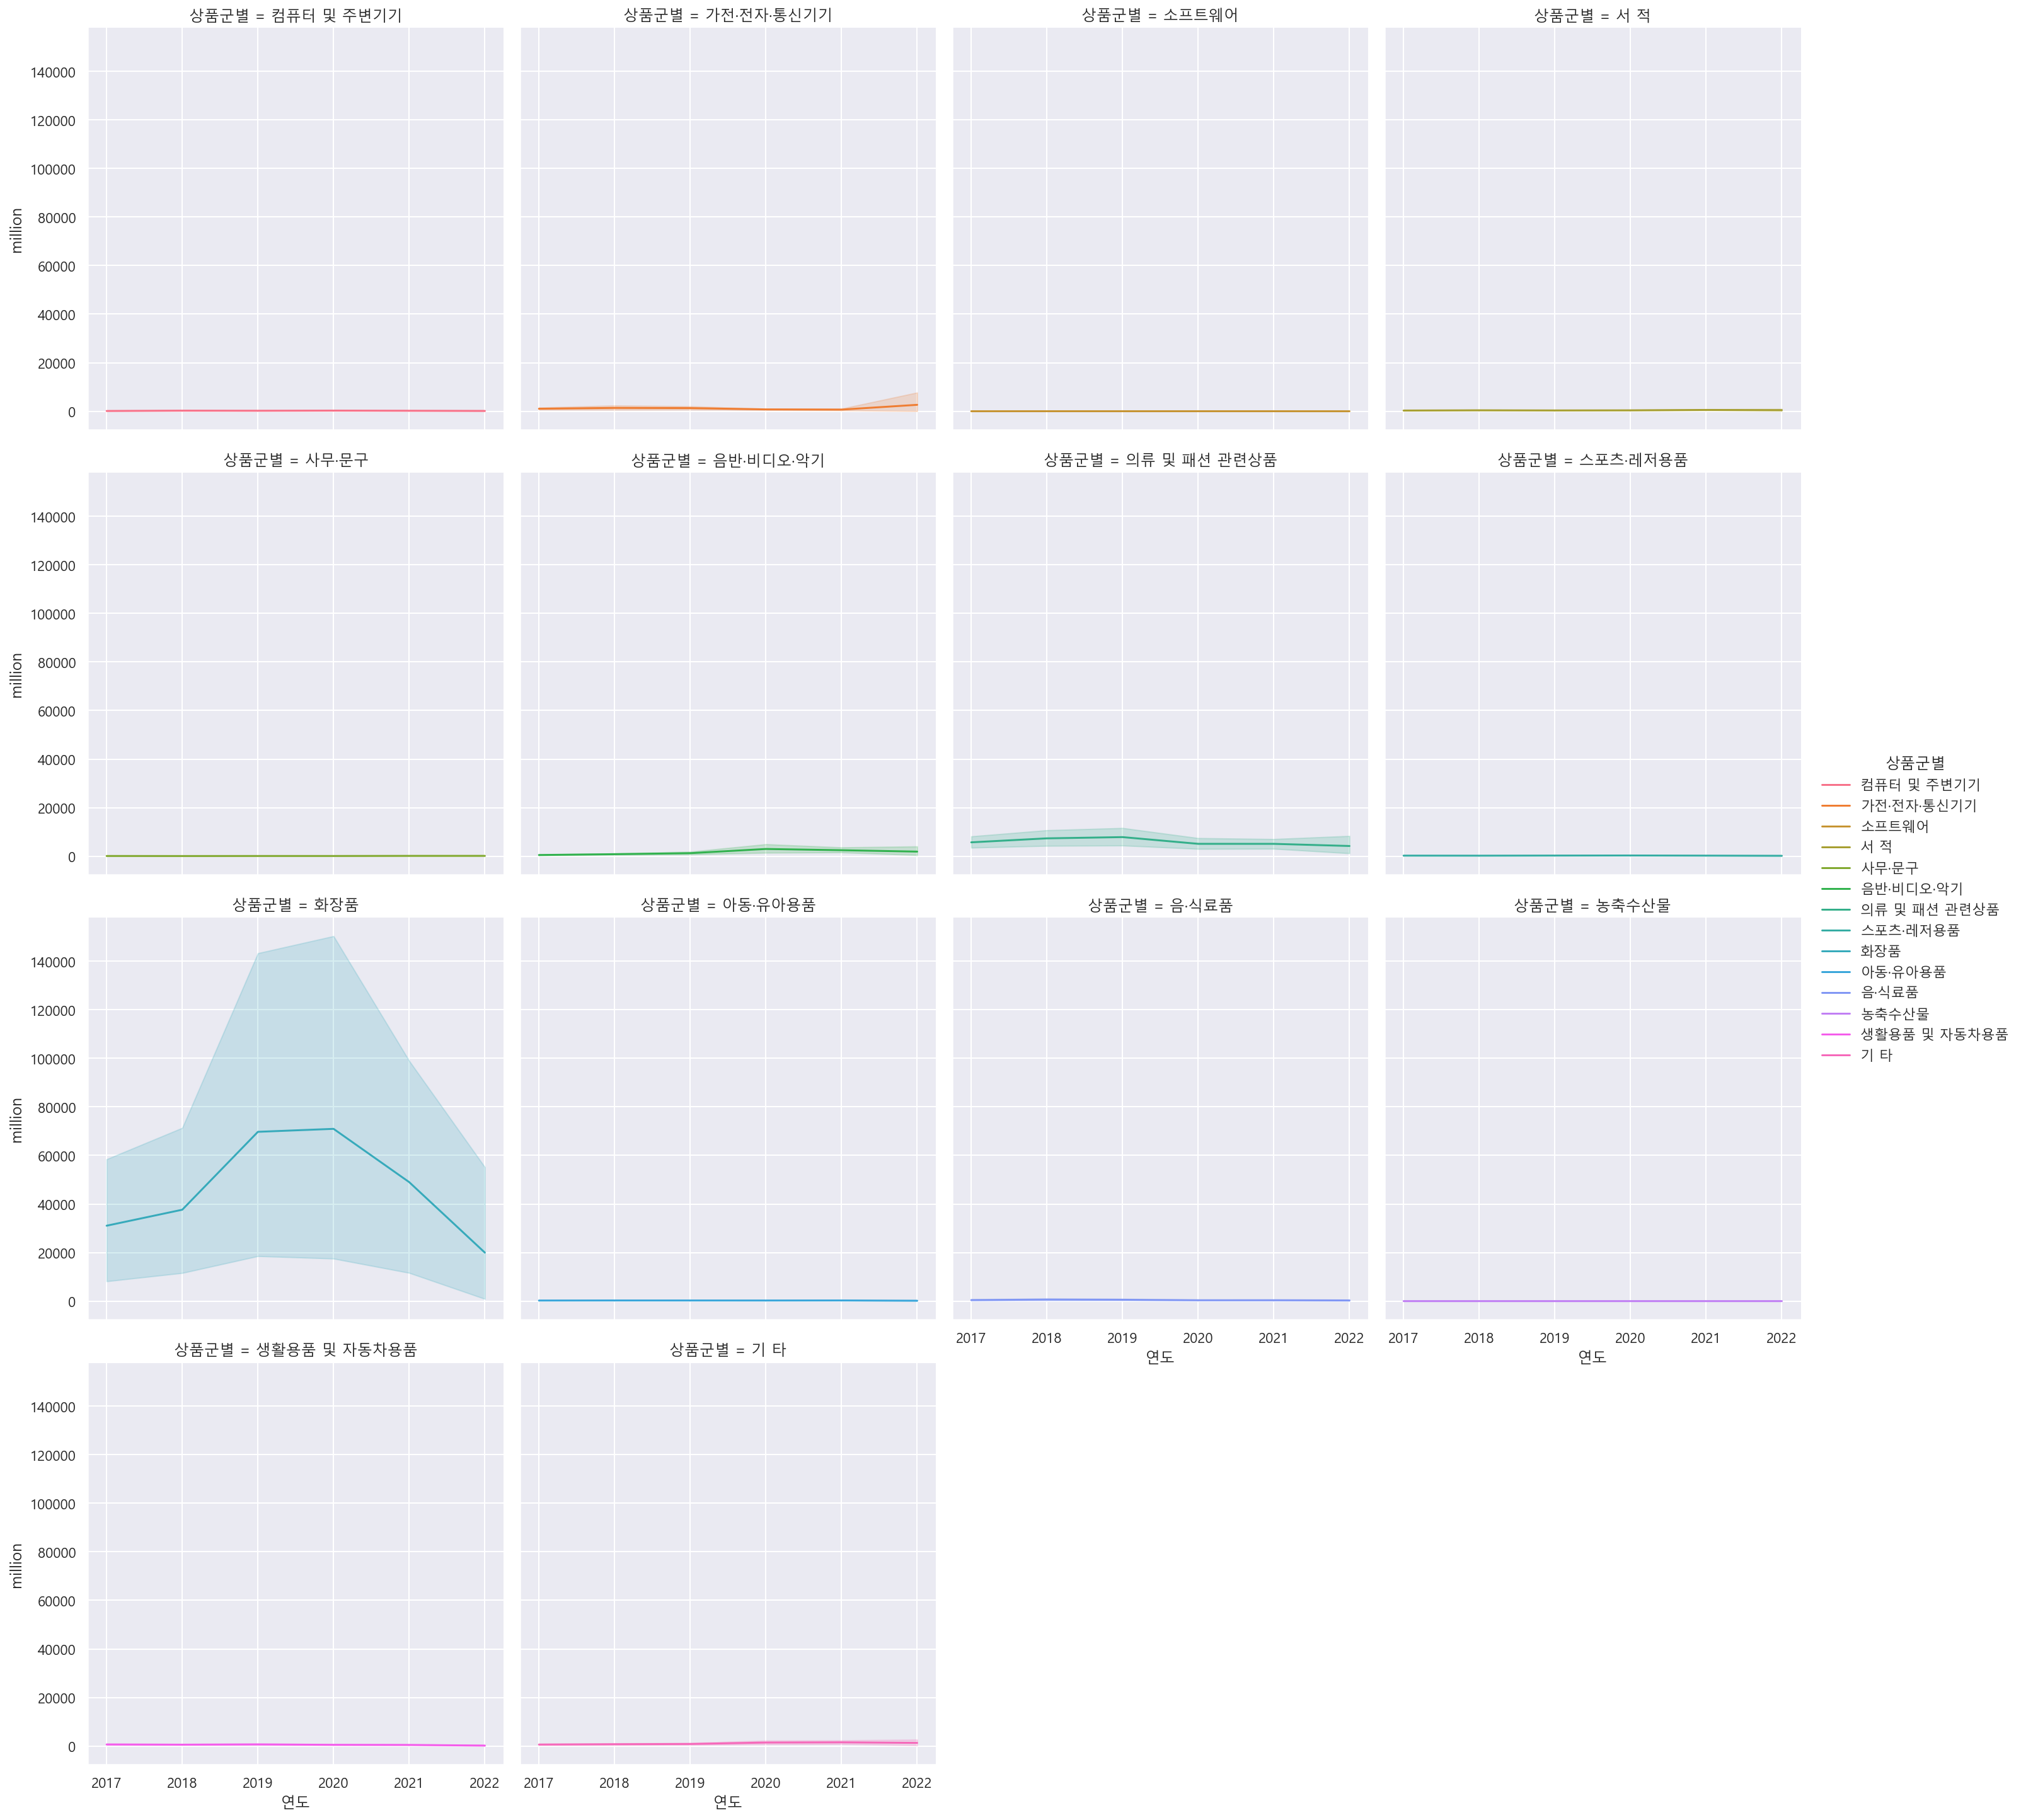

In [32]:
sns.relplot(x="연도", y="million", data=df, hue="상품군별", col="상품군별", col_wrap=4, kind="line")

In [33]:
df_sub =  df[~df["상품군별"].isin(["화장품"])]
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,million,연도,분기
49,미국,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014.1/4,NaN,2014,1
52,미국,가전·전자·통신기기,면세점,2014.1/4,NaN,2014,1
53,미국,가전·전자·통신기기,면세점 이외,2014.1/4,NaN,2014,1
55,미국,소프트웨어,면세점,2014.1/4,NaN,2014,1
...,...,...,...,...,...,...,...
14843,기타,농축수산물,면세점 이외,2022.1/4 p),10.0,2022,1
14845,기타,생활용품 및 자동차용품,면세점,2022.1/4 p),0.0,2022,1
14846,기타,생활용품 및 자동차용품,면세점 이외,2022.1/4 p),267.0,2022,1
14848,기타,기 타,면세점,2022.1/4 p),0.0,2022,1


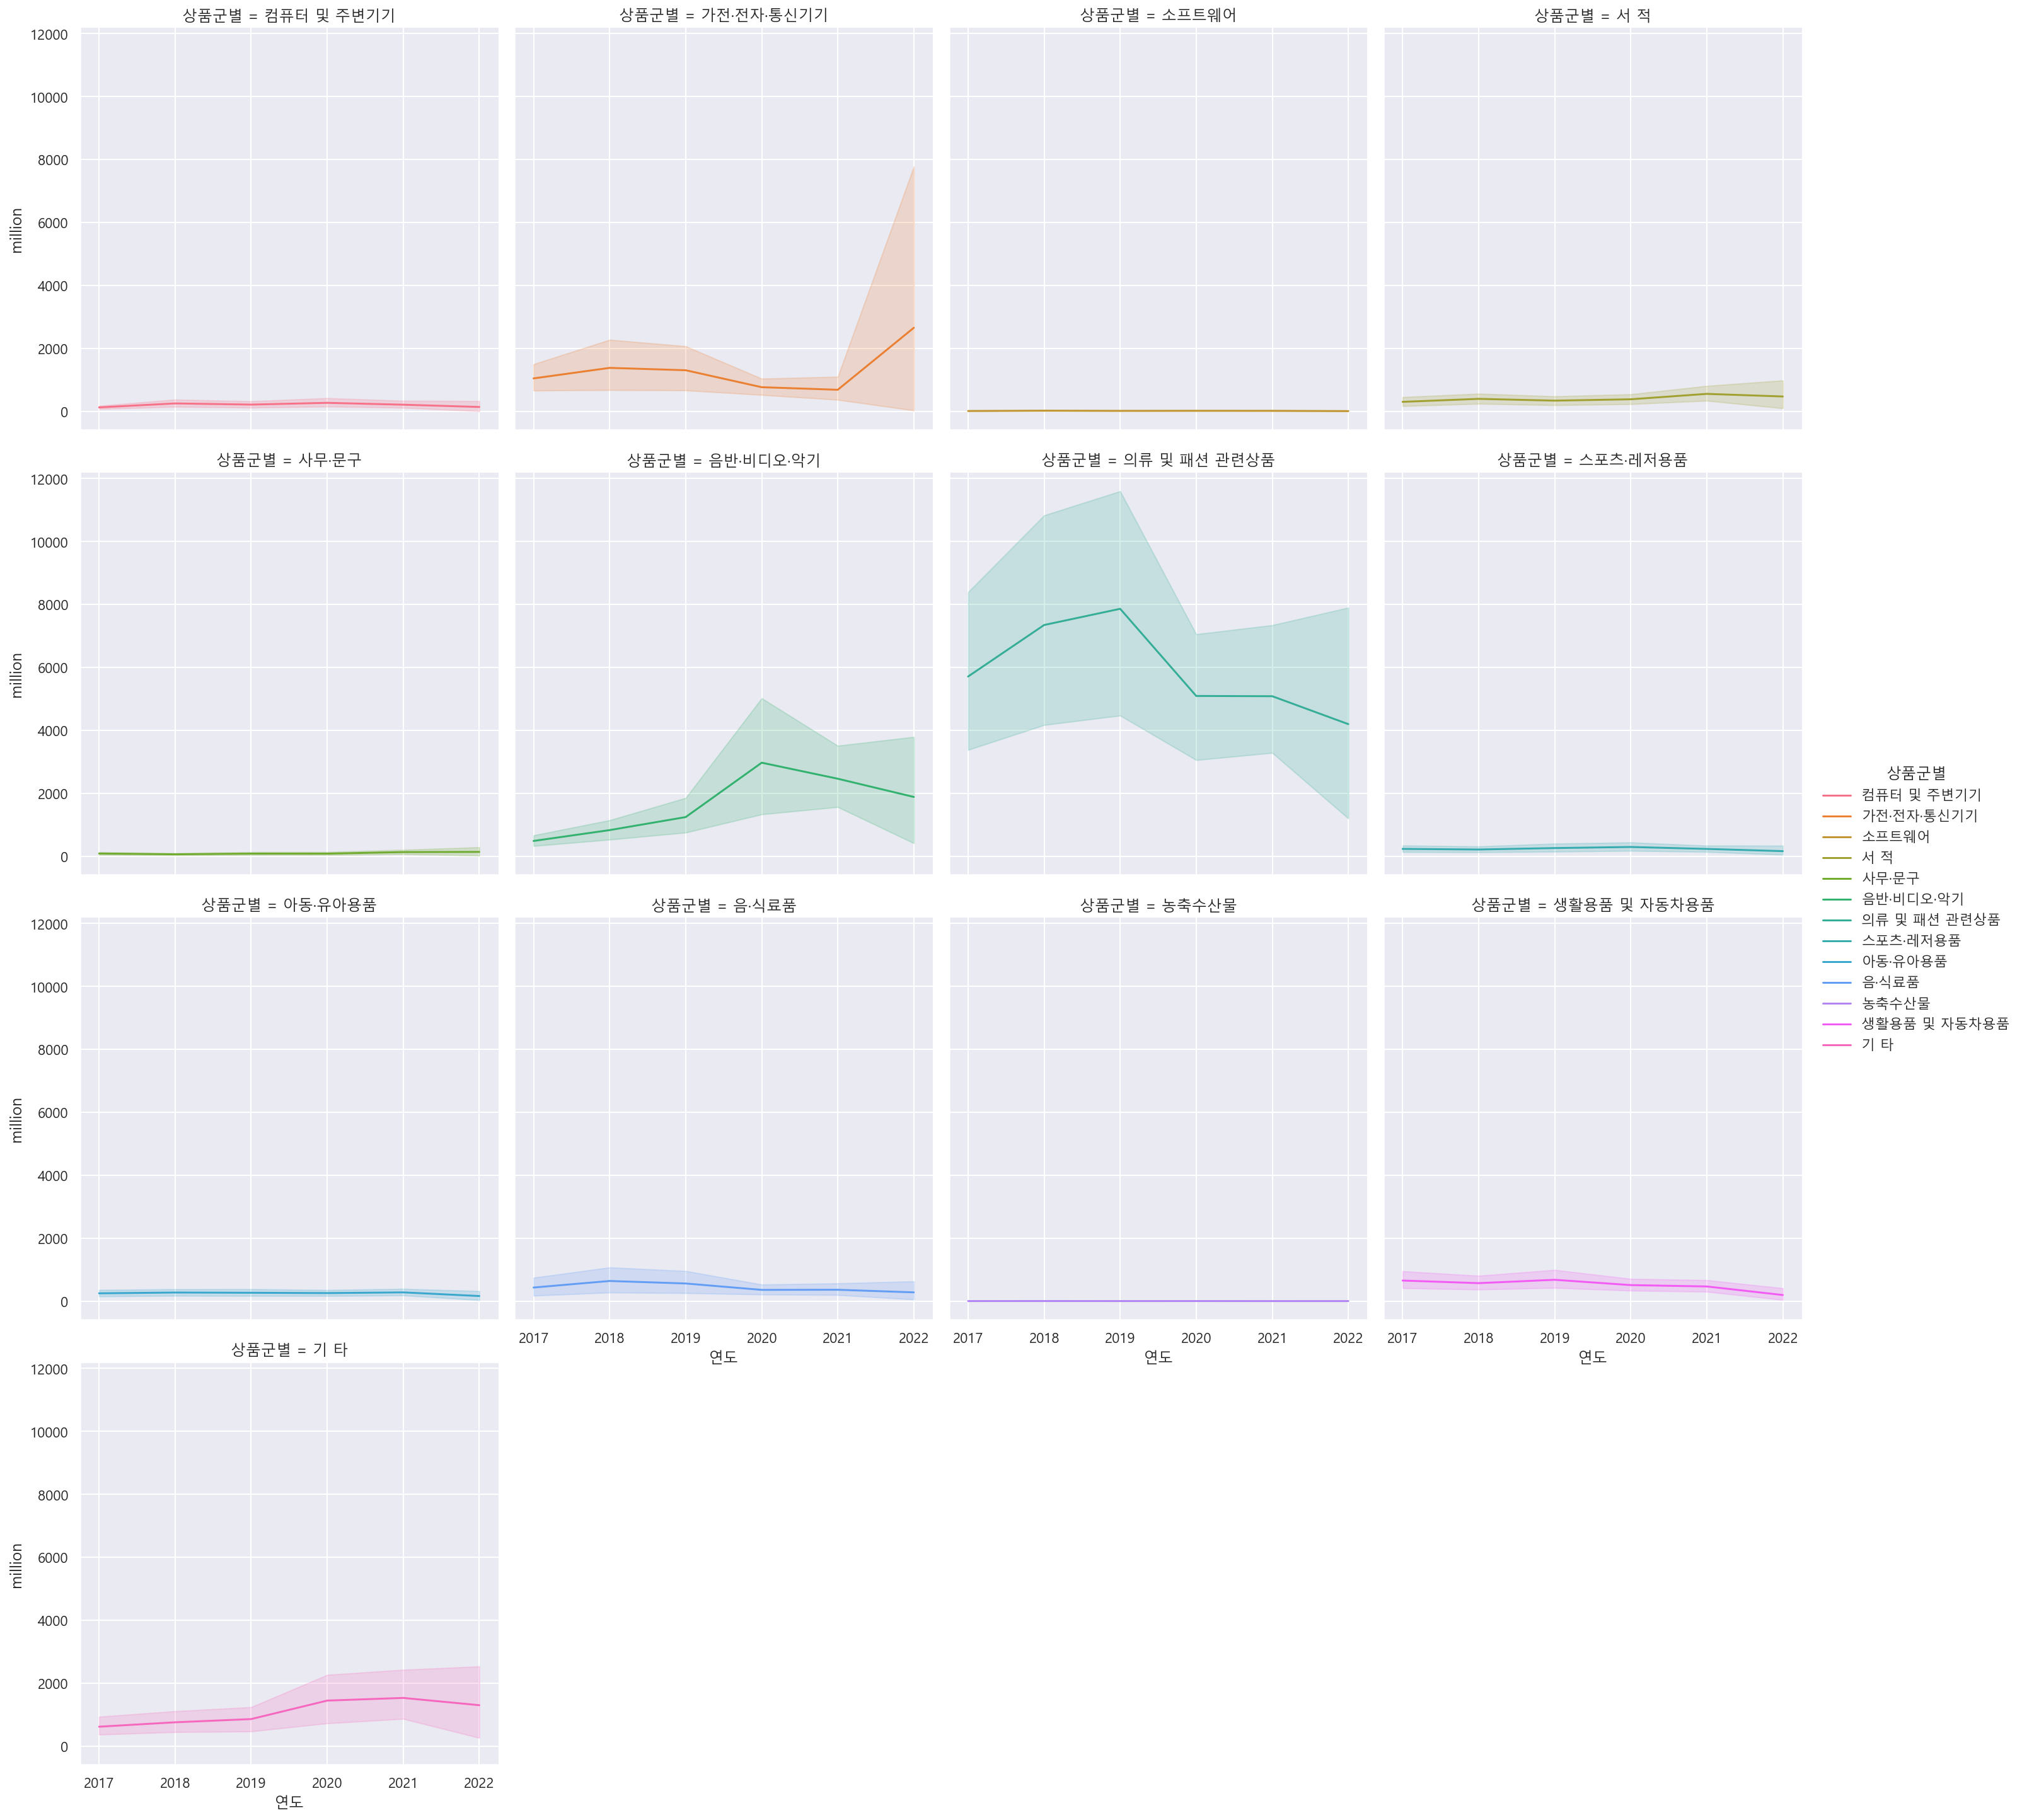

In [34]:
sns.relplot(x="연도", y="million", data=df_sub, 
            hue="상품군별", col="상품군별", col_wrap=4, kind="line")

### 화장품의 온라인쇼핑 해외직접판매액

<AxesSubplot:xlabel='연도', ylabel='million'>

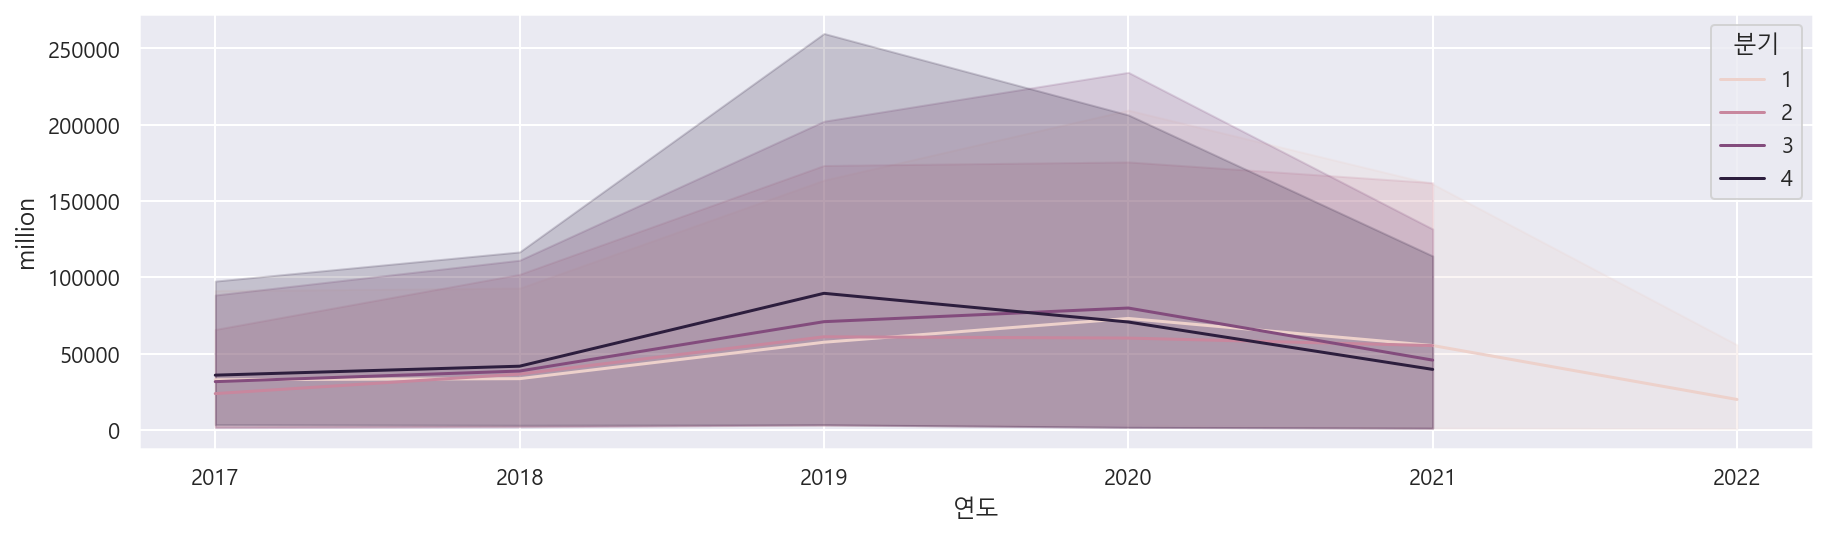

In [35]:
df_cosmetic = df[(df["상품군별"] == "화장품")]
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x="연도", y="million", hue="분기")

<AxesSubplot:xlabel='기간', ylabel='million'>

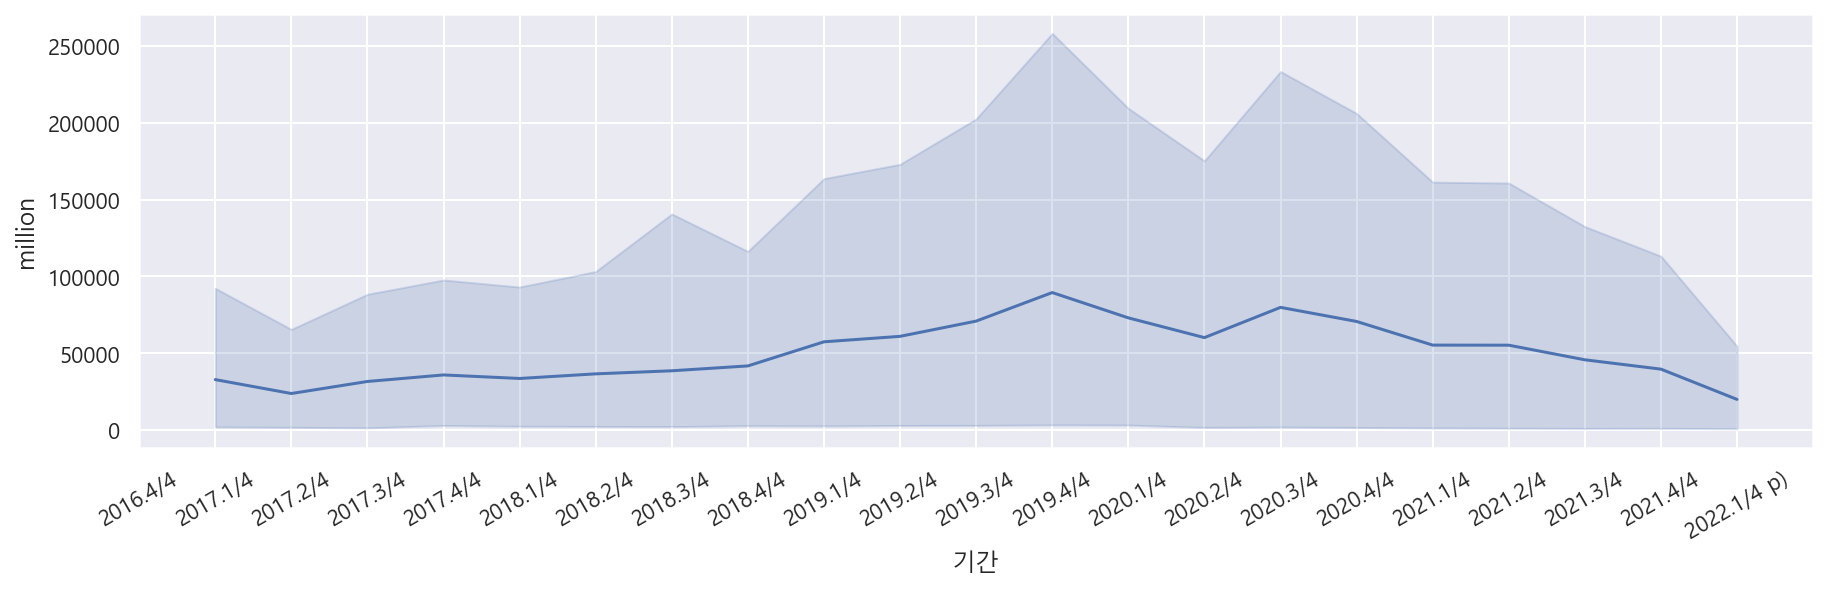

In [36]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million")

<AxesSubplot:xlabel='기간', ylabel='million'>

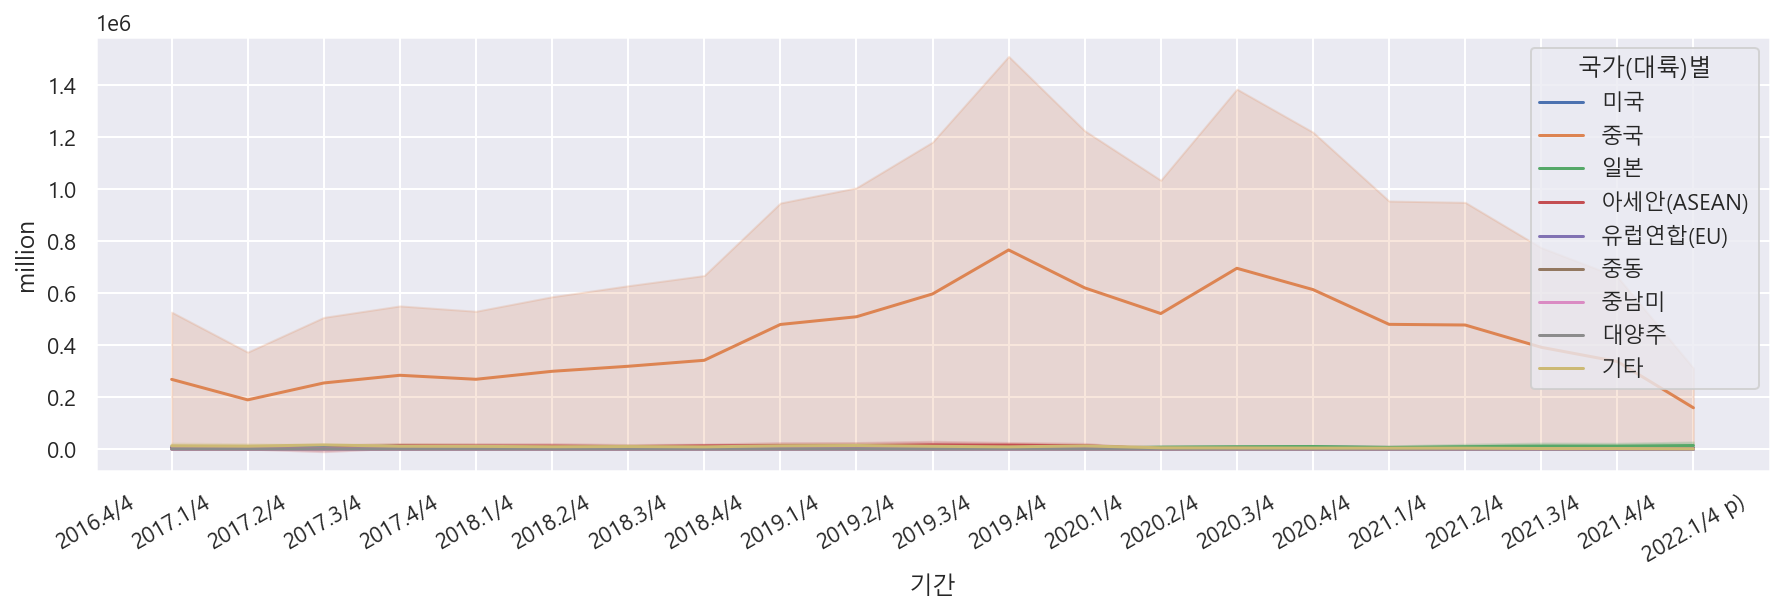

In [37]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='million'>

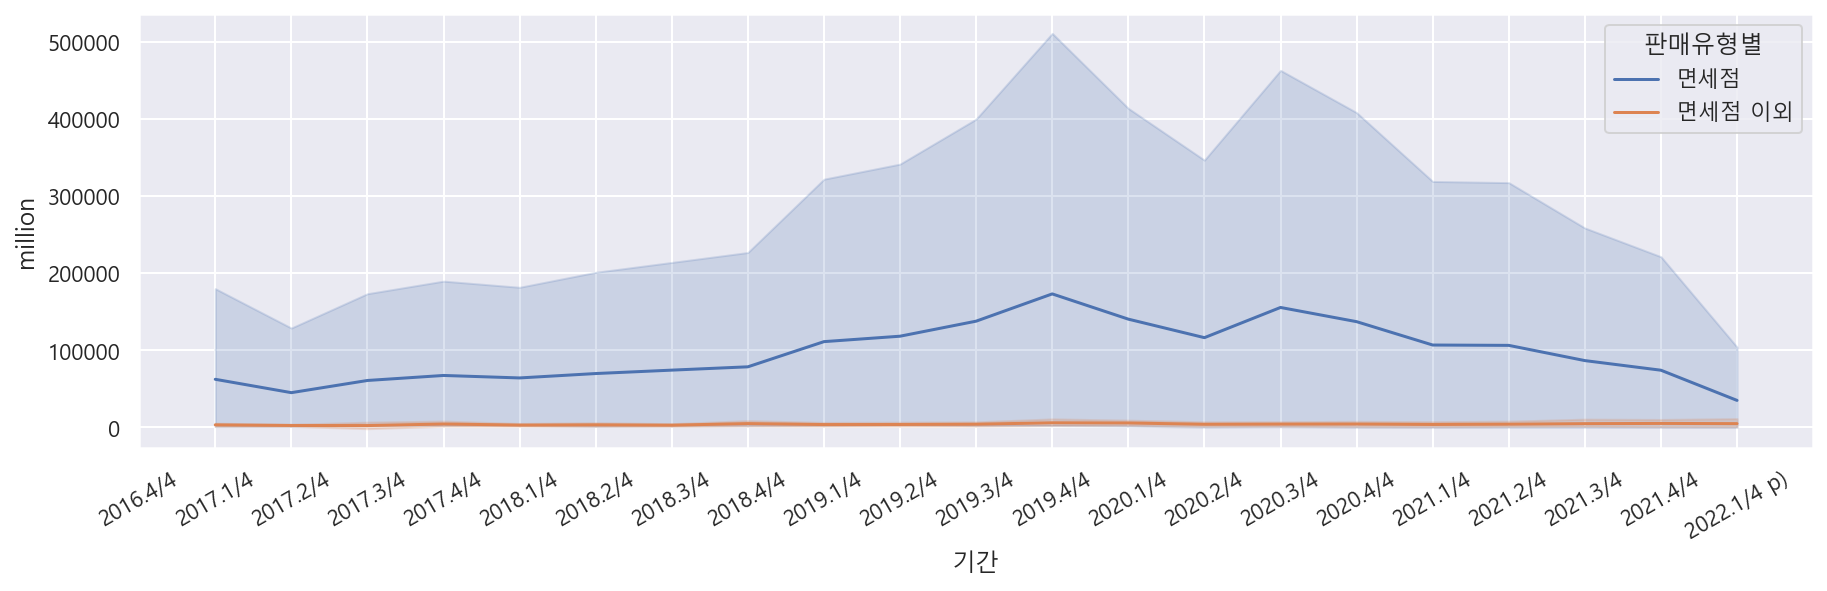

In [38]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="million", hue="판매유형별")

### 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액

<AxesSubplot:title={'center':'의류 및 패션관련 상품'}, xlabel='기간', ylabel='million'>

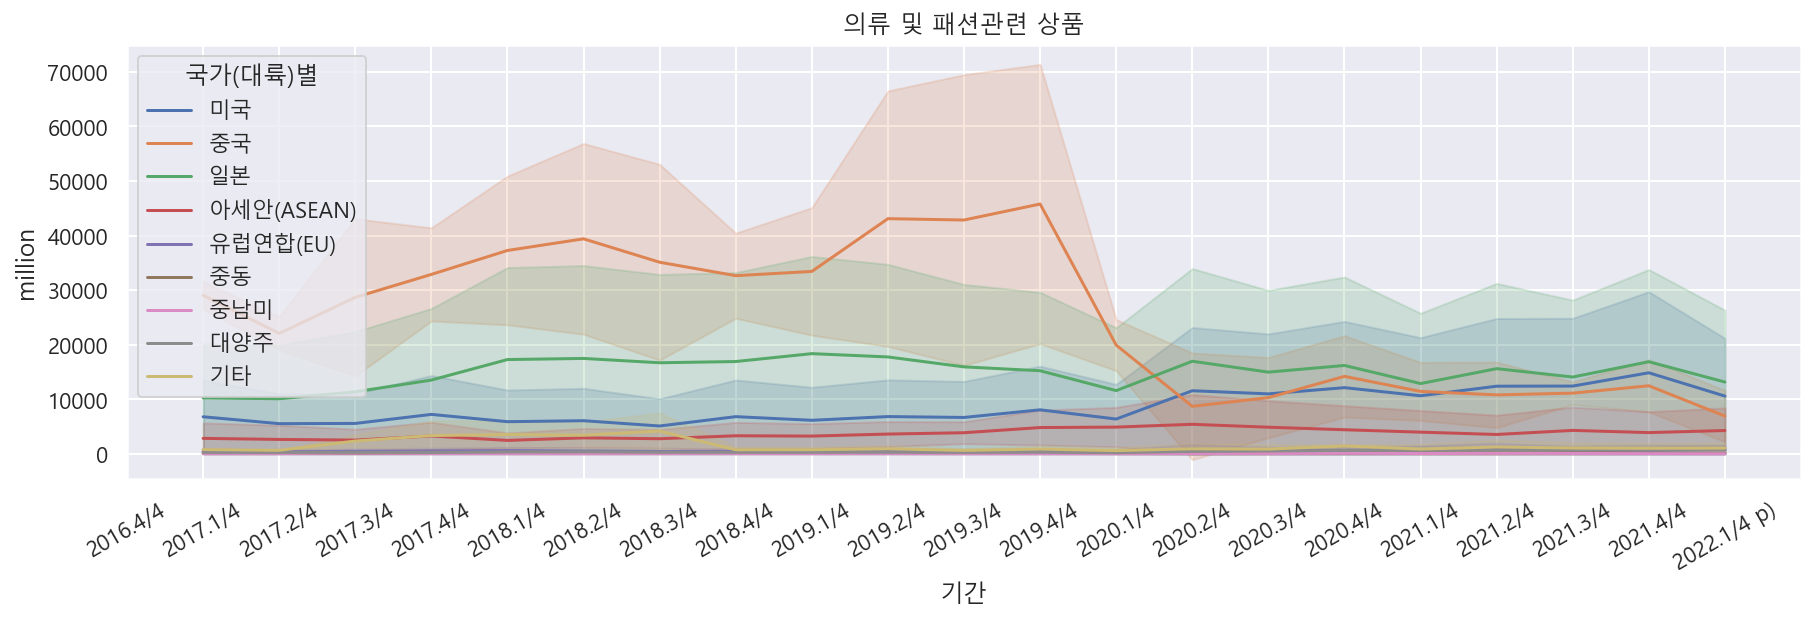

In [39]:
df_fashion = df[df["상품군별"].str.contains("의류")]
plt.figure(figsize=(15, 4))
plt.title("의류 및 패션관련 상품")
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="million", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='million'>

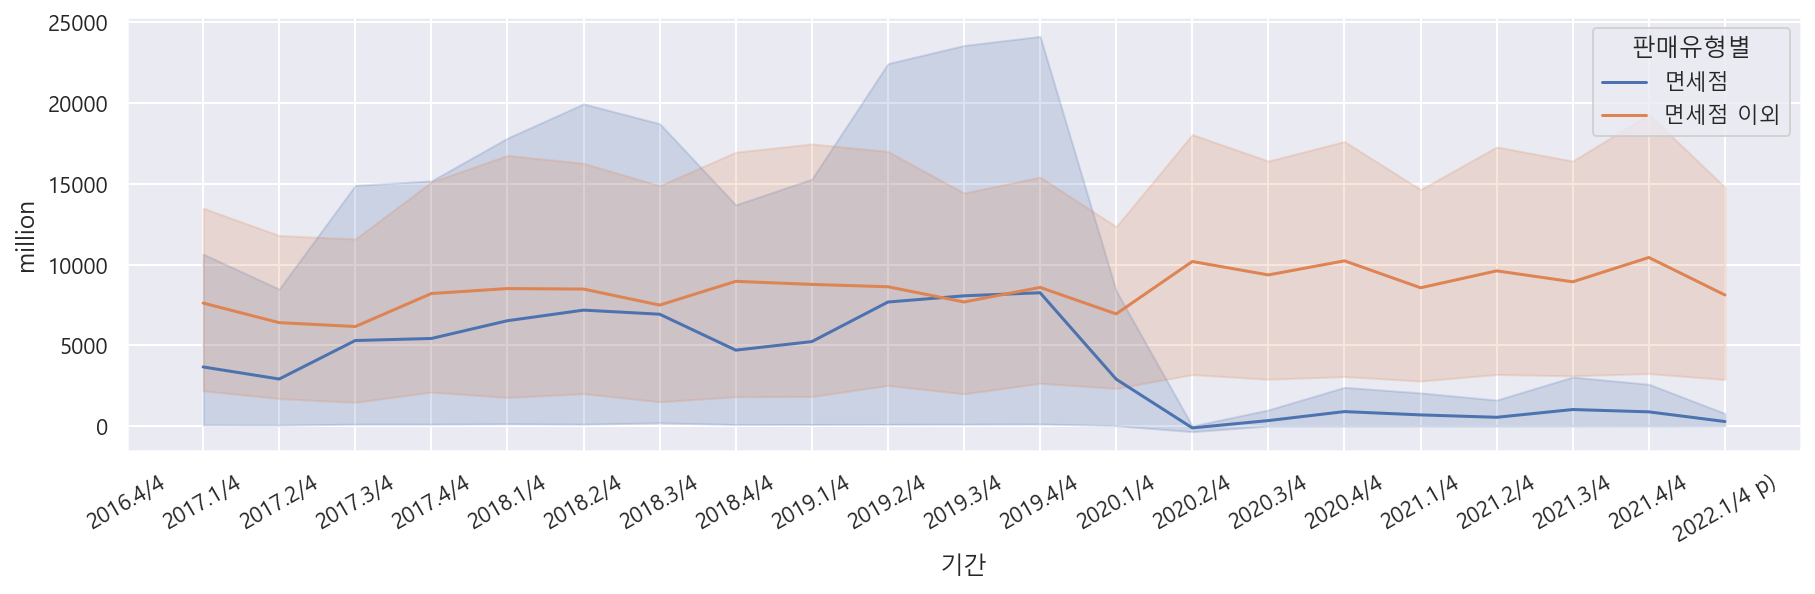

In [40]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="million", hue="판매유형별")

### 데이터 집계하기

In [41]:
pivot = df_fashion.pivot_table(
    index="국가(대륙)별", values="million", 
    columns="연도", aggfunc="sum")
pivot

연도,2014,2015,2016,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,,,,
기타,0.0,0.0,0.0,14387.0,23901.0,6475.0,7807.0,8578.0,2139.0
대양주,0.0,0.0,0.0,2266.0,2725.0,2489.0,3749.0,6023.0,1581.0
미국,0.0,0.0,0.0,50353.0,47875.0,55536.0,82207.0,100721.0,21186.0
아세안(ASEAN),0.0,0.0,0.0,22671.0,23068.0,31247.0,39339.0,31549.0,8574.0
유럽연합(EU),0.0,0.0,0.0,3736.0,4114.0,3694.0,5128.0,6225.0,1600.0
일본,0.0,0.0,0.0,90584.0,136800.0,134637.0,119531.0,118967.0,26333.0
중국,0.0,0.0,0.0,225407.0,288848.0,330267.0,106346.0,91770.0,13868.0
중남미,0.0,0.0,0.0,762.0,576.0,544.0,614.0,611.0,47.0
중동,0.0,0.0,0.0,772.0,879.0,951.0,1776.0,1462.0,183.0


### 연산결과를 시각적으로 보기

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

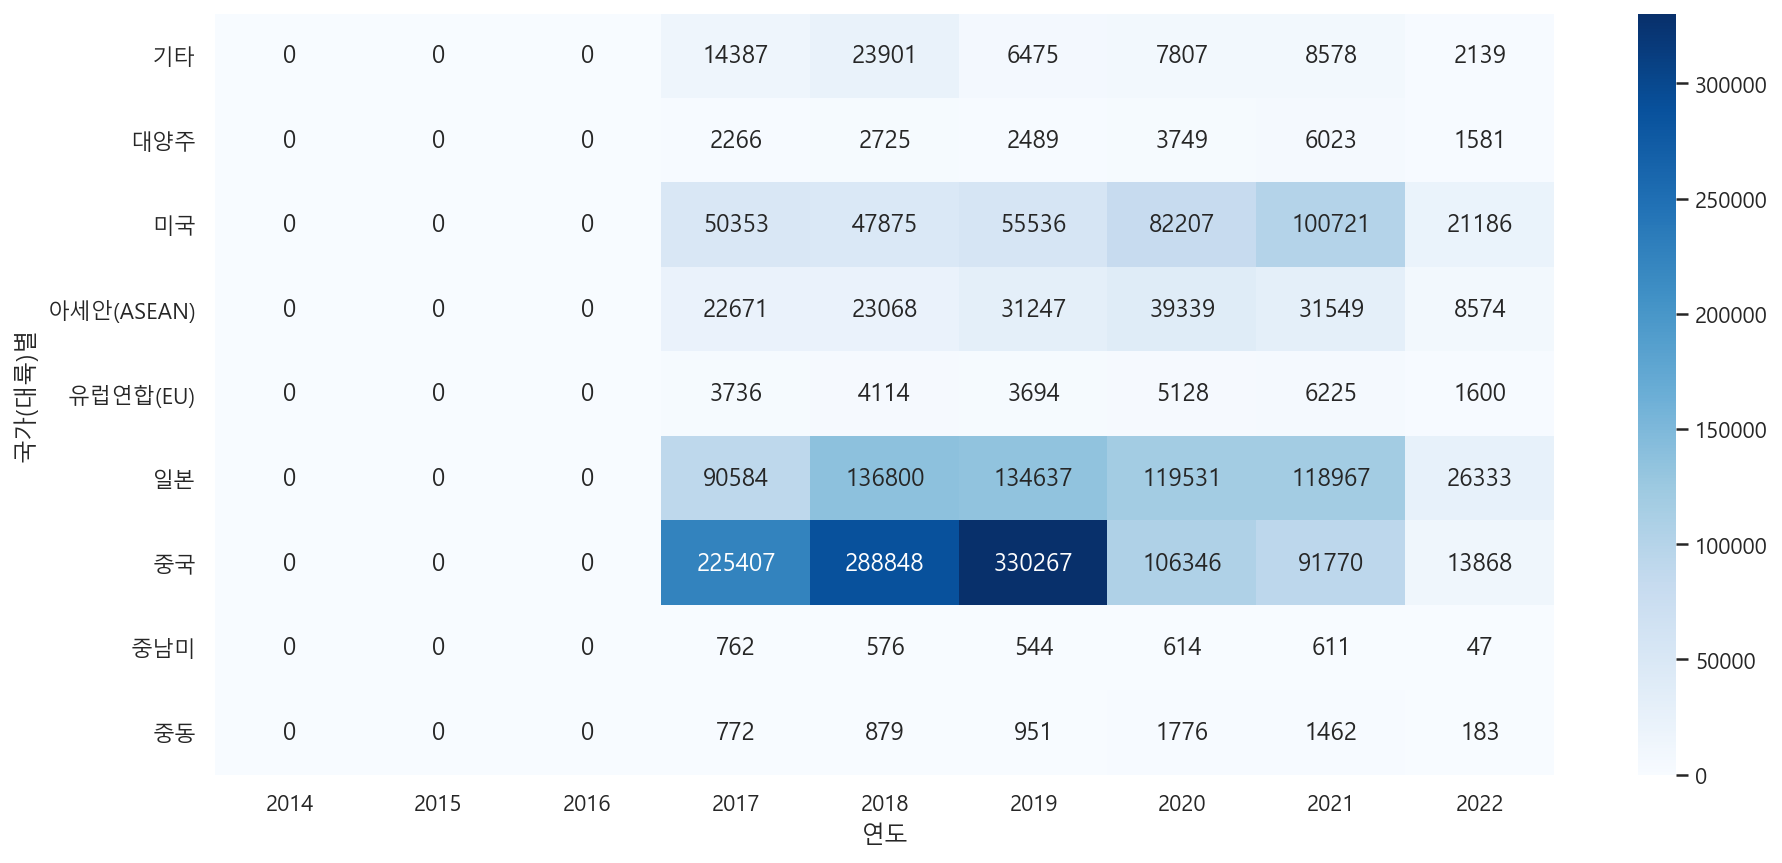

In [42]:
plt.figure(figsize=(15, 7))
sns.heatmap(pivot, cmap="Blues", annot=True, fmt=".0f")

## 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?

<AxesSubplot:xlabel='연도', ylabel='million'>

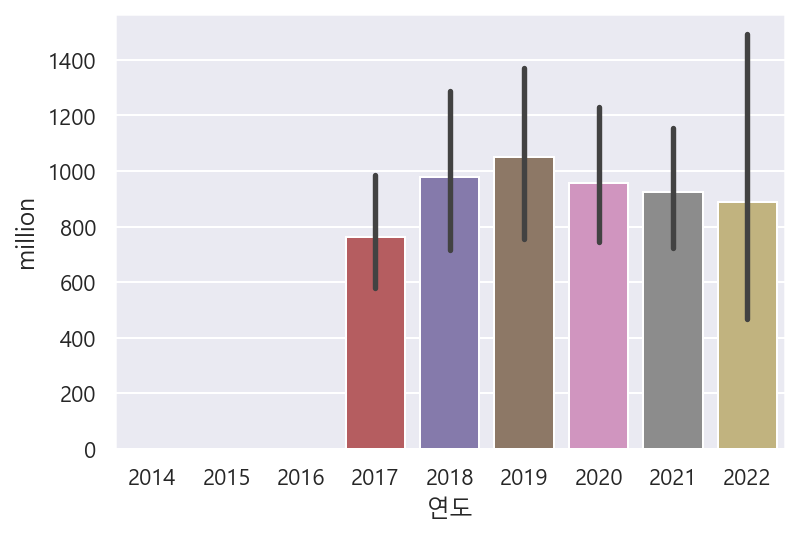

In [43]:
sns.barplot(x="연도", y="million", data=df_sub)

<AxesSubplot:xlabel='연도', ylabel='million'>

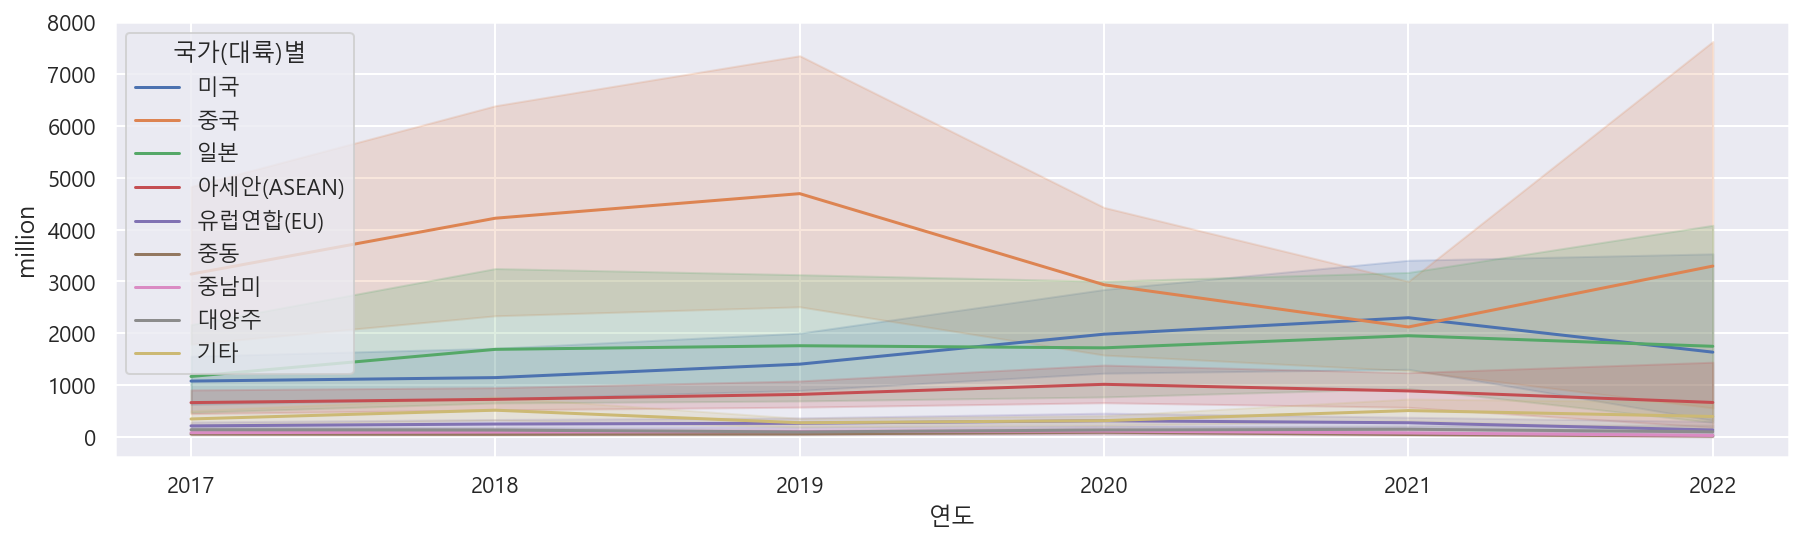

In [44]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df_sub, hue="국가(대륙)별")

* lengend를 그래프의 밖에 그리기 : [matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

<AxesSubplot:xlabel='연도', ylabel='million'>

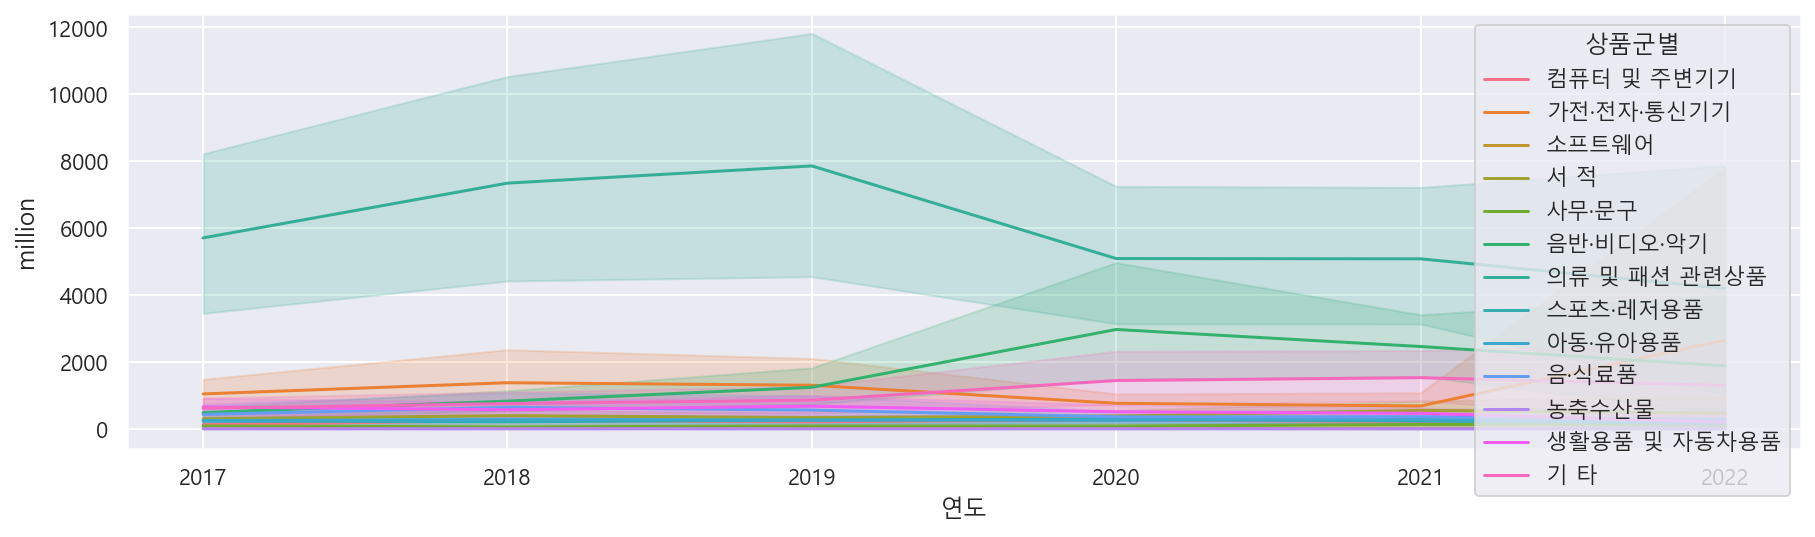

In [45]:
plt.figure(figsize=(15, 4))
sns.lineplot(x="연도", y="million", data=df_sub, hue="상품군별")